**Group Members are:**
1. Tanmay Joshi
2. Sahil Bhawani
3. Saurabh Keskar
4. Omkar Pawar
5. Yash Rane

## **Import and Install Dependencies**


In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.9.3-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.2-cp39-cp39-win_amd64.whl (444.1 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.9.0-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.8.4-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.3-cp39-cp39-win_amd64.whl (438.4 MB)
  Using cached tensorflow_gpu-2.8.2-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu-2.8.1-cp39-cp39-win_amd64.whl (438.3 MB)
  Using cached tensorflow_gpu

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## **Using MP Holistic**

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.right_hand_landmarks.landmark)

21

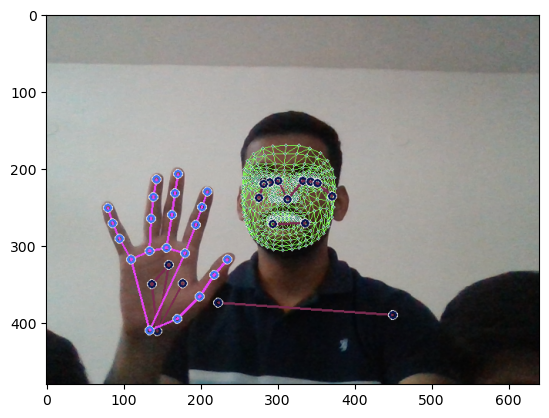

In [8]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## **Extract Key Points**

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
len(pose)

33

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks:
    pass
else:
    np.zeros(468*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.48932949,  0.50166148, -0.61273098, ...,  0.12613456,
        0.52487165, -0.06477989])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.48932949,  0.50166148, -0.61273098, ...,  0.12613456,
        0.52487165, -0.06477989])

## **Setup Folders for Collections**

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'iloveyou', 'namaste', 'salute', 'allTheBest', 'howAreYou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [68]:
# Hello 
# I love you
# Namaste
# Salute
# All the best
# How are you

In [69]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### **Collect Keypoints for Training and Testing**

In [70]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## **Preprocess Data and create labels and features**

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0,
 'iloveyou': 1,
 'namaste': 2,
 'salute': 3,
 'allTheBest': 4,
 'howAreYou': 5}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(180, 30, 1662)

In [25]:
np.array(labels).shape

(180,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(180, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(9, 6)

## **Build and Train LSTM Model**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [68]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
# 136

In [69]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [70]:
actions.shape[0]

6

In [71]:
res = [0.2,0.1,0.4, 0.1, 0.1, 0.1]

In [72]:
np.argmax(res)

2

In [73]:
actions[np.argmax(res)]

'namaste'

In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=150, callbacks=[tb_callback])

Epoch 1/150
6/6 [==============================] - 7s 140ms/step - loss: 5.3778 - categorical_accuracy: 0.1579
Epoch 2/150
6/6 [==============================] - 1s 130ms/step - loss: 3.4828 - categorical_accuracy: 0.1462
Epoch 3/150
6/6 [==============================] - 1s 122ms/step - loss: 3.6053 - categorical_accuracy: 0.1637
Epoch 4/150
6/6 [==============================] - 1s 120ms/step - loss: 2.5752 - categorical_accuracy: 0.2164
Epoch 5/150
6/6 [==============================] - 1s 123ms/step - loss: 1.9304 - categorical_accuracy: 0.1637
Epoch 6/150
6/6 [==============================] - 1s 133ms/step - loss: 1.7930 - categorical_accuracy: 0.1871
Epoch 7/150
6/6 [==============================] - 1s 143ms/step - loss: 1.7536 - categorical_accuracy: 0.2339
Epoch 8/150
6/6 [==============================] - 1s 124ms/step - loss: 1.6606 - categorical_accuracy: 0.2339
Epoch 9/150
6/6 [==============================] - 1s 101ms/step - loss: 1.6457 - categorical_accuracy: 0.2632
E

6/6 [==============================] - 1s 130ms/step - loss: 0.0830 - categorical_accuracy: 0.9708
Epoch 147/150
6/6 [==============================] - 1s 114ms/step - loss: 0.5178 - categorical_accuracy: 0.8421
Epoch 148/150
6/6 [==============================] - 1s 128ms/step - loss: 0.7097 - categorical_accuracy: 0.7193
Epoch 149/150
6/6 [==============================] - 1s 109ms/step - loss: 0.5202 - categorical_accuracy: 0.7895
Epoch 150/150
6/6 [==============================] - 1s 119ms/step - loss: 0.4499 - categorical_accuracy: 0.8421


In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596,774
Trainable params: 596,774
Non-tr

## **Make Predictions**

In [77]:
res = model.predict(X_test)

1/1 [==============================] - 1s 913ms/step


In [78]:
res

array([[2.33535409e-01, 1.51042707e-06, 2.57157808e-06, 7.50212073e-01,
        1.61459688e-02, 1.02401485e-04],
       [7.02919513e-02, 2.39075621e-06, 2.57889519e-06, 9.16814625e-01,
        1.27026625e-02, 1.85848476e-04],
       [1.03348364e-15, 1.60688581e-03, 9.98379230e-01, 1.31848593e-16,
        5.35730106e-11, 1.39541171e-05],
       [6.20674826e-02, 1.03894411e-06, 1.34875586e-06, 9.28558767e-01,
        9.27109364e-03, 1.00396435e-04],
       [9.45735455e-01, 1.12821974e-08, 3.95276594e-08, 4.68935966e-02,
        7.37067871e-03, 2.40297567e-07],
       [6.28386214e-02, 1.31143821e-07, 3.22917742e-07, 9.32153404e-01,
        4.98723565e-03, 2.03908694e-05],
       [1.50223685e-04, 2.58858740e-01, 2.20280662e-01, 1.22844373e-04,
        2.32074969e-03, 5.18266797e-01],
       [4.97480519e-02, 7.79268006e-03, 2.87740794e-03, 1.67561769e-01,
        6.32030547e-01, 1.39989495e-01],
       [3.58933099e-02, 1.19988304e-02, 5.13738161e-03, 1.12225957e-01,
        4.84595060e-01, 

In [79]:
actions[np.argmax(res[3])]

'salute'

In [80]:
actions[np.argmax(y_test[3])]

'salute'

## **Save Model**

In [56]:
model.save('action.h5')

## **Evaluate using Confusion matrix and Accuracy**

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from keras import models

In [33]:
model = models.load_model('action.h5', compile=False)
yhat = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [34]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [35]:
ytrue

[4, 2, 4, 3, 4, 3, 3, 5, 5]

In [36]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[8, 0],
        [0, 1]],

       [[6, 0],
        [0, 3]],

       [[6, 0],
        [0, 3]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [37]:
accuracy_score(ytrue, yhat)

1.0

## **Test in Real Time**

In [38]:
from scipy import stats

In [39]:
colors = [(245,117,16), (117,245,16), (16,117,245), (100,191,214), (249,220,153), (81,25,15)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

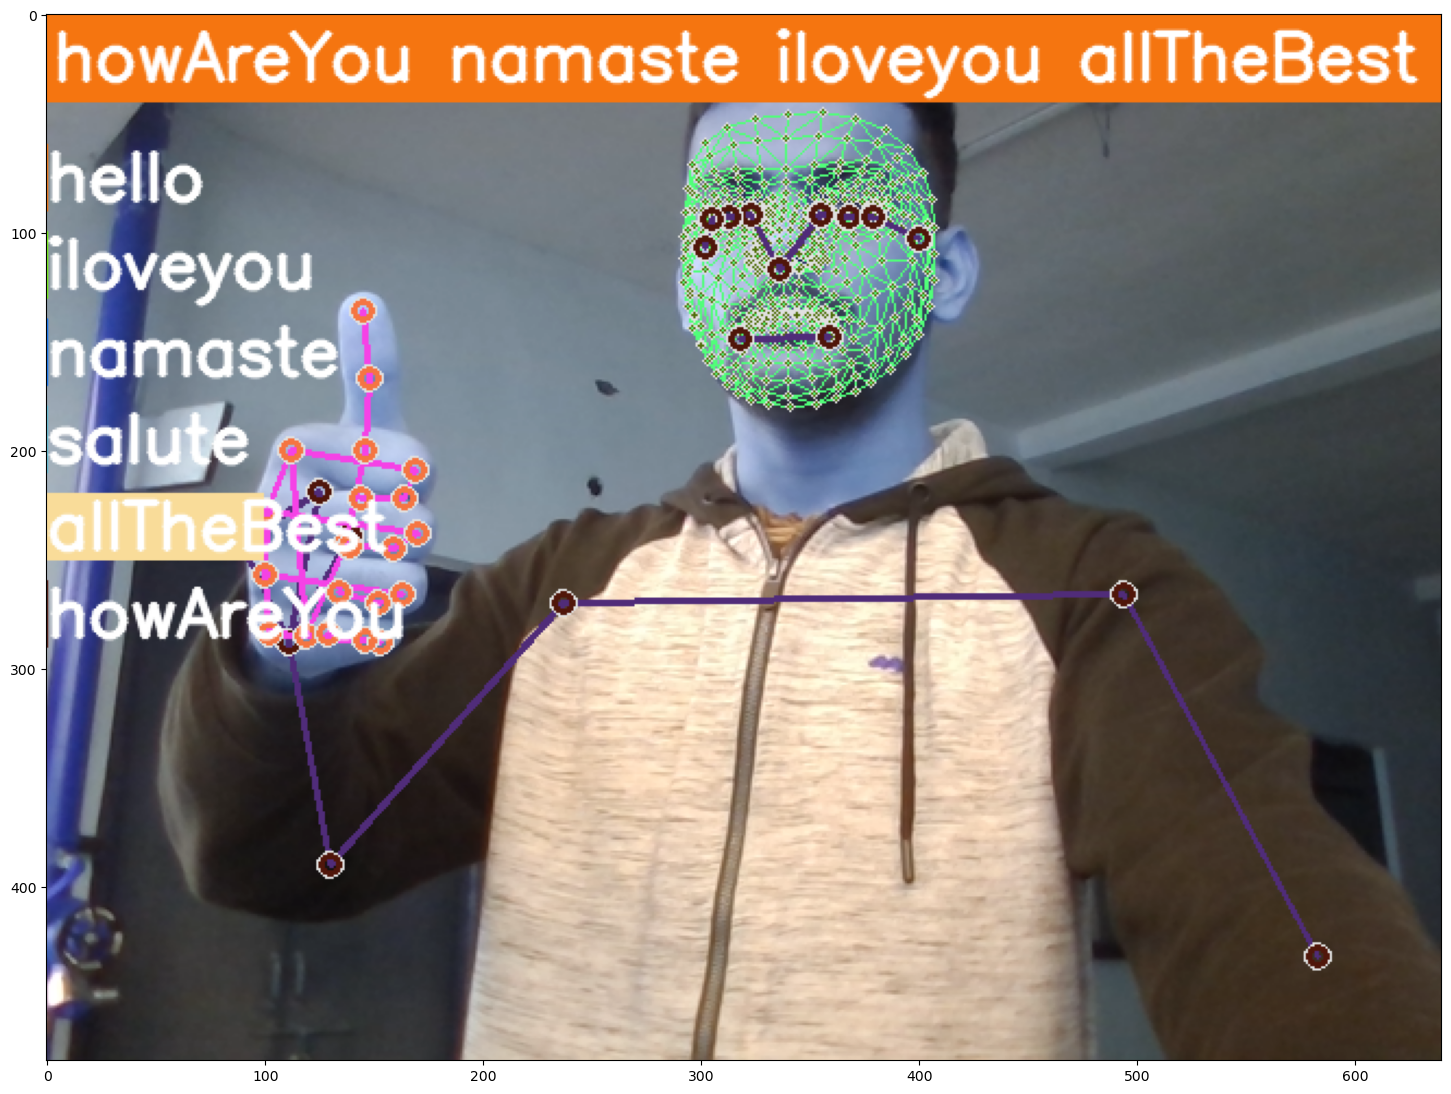

In [66]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 69ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
howAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
howAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 60ms/step
howAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 71ms/step
howAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 61ms/step
howAreYou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
h

1/1 [==============================] - 0s 48ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
namaste
<cla

In [61]:
# res
# np.argmax(res)
res[np.argmax(res)] > threshold
# len(res)

True